In [41]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend as K

class LeNet:
	@staticmethod
	def build(width, height, depth, classes):
		# initialize the model
		model = Sequential()
		inputShape = (height, width, depth)

		# if we are using "channels first", update the input shape
		if K.image_data_format() == "channels_first":
			inputShape = (depth, height, width)

		# first set of CONV => RELU => POOL layers
		model.add(Conv2D(20, (5, 5), padding="same",
			input_shape=inputShape))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

		# second set of CONV => RELU => POOL layers
		model.add(Conv2D(50, (5, 5), padding="same"))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

		# first (and only) set of FC => RELU layers
		model.add(Flatten())
		model.add(Dense(500))
		model.add(Activation("relu"))

		# softmax classifier
		model.add(Dense(classes))
		model.add(Activation("softmax"))

		# return the constructed network architecture
		return model

In [42]:
import matplotlib
matplotlib.use("Agg")

# import the necessary packages
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical
import numpy as np
import argparse
import random
import os
from imutils import paths
import cv2


In [43]:
# initialize the number of epochs to train for, initial learning rate,
# and batch size
EPOCHS = 25
INIT_LR = 1e-3
BS = 32
 
# initialize the data and labels
print("[INFO] loading images...")
data = []
labels = []



[INFO] loading images...


In [44]:
rootdir = '/Users/houzhuo/Downloads/image-classification-keras/images/santa'
#dataset = '/santa/'
santa_list = os.listdir(rootdir) #列出文件夹下所有的目录与文件
for i in range(0,len(santa_list)):
    santa_list[i] = os.path.join(rootdir, santa_list[i])
# grab the image paths and randomly shuffle them
santa_imagePaths = sorted(santa_list)
random.seed(42)
random.shuffle(santa_imagePaths)
    


In [45]:
# loop over the input images
for imagePath in santa_imagePaths:
    # load the image, pre-process it, and store it in the data list
    #print(imagePath)
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (28, 28))
    image = img_to_array(image)
    data.append(image)
    labels.append(1)

In [46]:
rootdir = '/Users/houzhuo/Downloads/image-classification-keras/images/not_santa'
#dataset = '/santa/'
not_santa_list = os.listdir(rootdir) #列出文件夹下所有的目录与文件
for i in range(0,len(not_santa_list)):
    not_santa_list[i] = os.path.join(rootdir, not_santa_list[i])
# grab the image paths and randomly shuffle them
not_santa_imagePaths = sorted(not_santa_list)
random.seed(42)
random.shuffle(not_santa_imagePaths)
# loop over the input images
for imagePath in not_santa_imagePaths:
    # load the image, pre-process it, and store it in the data list
    #print(imagePath)
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (28, 28))
    image = img_to_array(image)
    data.append(image)
    labels.append(0)

In [47]:
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)
 
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42)
 
# convert the labels from integers to vectors
trainY = to_categorical(trainY, num_classes=2)
testY = to_categorical(testY, num_classes=2)

In [49]:
# construct the image generator for data augmentation
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
    horizontal_flip=True, fill_mode="nearest")

In [64]:
# initialize the model
print("[INFO] compiling model...")
model = LeNet.build(width=28, height=28, depth=3, classes=2)
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

# train the network
print("[INFO] training network...")
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=BS),
    validation_data=(testX, testY), steps_per_epoch=len(trainX) // BS,
    epochs=EPOCHS, verbose=1)

# save the model to disk
print("[INFO] serializing network...")


[INFO] compiling model...
[INFO] training network...
Epoch 1/25
21/21 [==============================] - 3s 141ms/step - loss: 0.7181 - acc: 0.5047 - val_loss: 0.6461 - val_acc: 0.5801
Epoch 2/25
21/21 [==============================] - 2s 110ms/step - loss: 0.5668 - acc: 0.6373 - val_loss: 0.4561 - val_acc: 0.7879
Epoch 3/25
21/21 [==============================] - 2s 99ms/step - loss: 0.3669 - acc: 0.8630 - val_loss: 0.2327 - val_acc: 0.9307
Epoch 4/25
21/21 [==============================] - 2s 110ms/step - loss: 0.2910 - acc: 0.8740 - val_loss: 0.1885 - val_acc: 0.9394
Epoch 5/25
21/21 [==============================] - 2s 97ms/step - loss: 0.3111 - acc: 0.8784 - val_loss: 0.1797 - val_acc: 0.9177
Epoch 6/25
21/21 [==============================] - 2s 87ms/step - loss: 0.2971 - acc: 0.8854 - val_loss: 0.4521 - val_acc: 0.8442
Epoch 7/25
21/21 [==============================] - 2s 105ms/step - loss: 0.2158 - acc: 0.9236 - val_loss: 0.1992 - val_acc: 0.9307
Epoch 8/25
21/21 [========

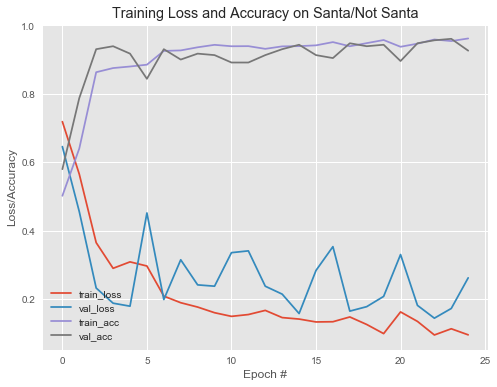

In [83]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
N = EPOCHS
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Santa/Not Santa")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

In [82]:
%matplotlib inline
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 8,6 # Big graphs unless specified
sns.set(color_codes=True) # Set style and color of graphs

In [84]:
# load the image
image = cv2.imread('/Users/houzhuo/Downloads/image-classification-keras/test.jpeg')
orig = image.copy()
# pre-process the image for classification
image = cv2.resize(image, (28, 28))
image = image.astype("float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)